Automatically created module for IPython interactive environment
1    47175
0    45433
Name: Class, dtype: int64
KNN: Accuracy Score: 0.5252492531404096
KNN: Precession Score: 0.5107724645296899
KNN: Recall Score: 0.8525069434293232
KNN: F1 Score: 0.6388082589407963
KNN: Accuracy Score: 0.5330237915271929
KNN: Precession Score: 0.5143867349426969
KNN: Recall Score: 0.9250840520391755
KNN: F1 Score: 0.6611470956957793
KNN: Accuracy Score: 0.5329158118273765
KNN: Precession Score: 0.5150827949167772
KNN: Recall Score: 0.8798421283438094
KNN: F1 Score: 0.6497719482902868
KNN: Accuracy Score: 0.5379548644854767
KNN: Precession Score: 0.5172540531710703
KNN: Recall Score: 0.9257418506066365
KNN: F1 Score: 0.6636799496973984
KNN: Accuracy Score: 0.5380628441852932
KNN: Precession Score: 0.5180073048500807
KNN: Recall Score: 0.8914632363689519
KNN: F1 Score: 0.6552594821102397
KNN: Accuracy Score: 0.5398265126156283
KNN: Precession Score: 0.518389437861331
KNN: Recall Score: 0.924060809823125

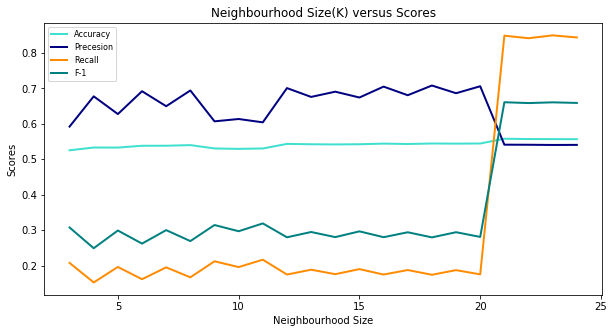

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils import resample

h = .02  # step size in the mesh


file = "C:\\Users\\Pavan\\Desktop\\Book1.csv";

df = pd.read_csv(file)#, 


print(df['Class'].value_counts())

y = df.Class
X = df.drop('Class', axis=1)

name = 'KNN'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

k_size = []
accu = []
pre = []
recall = []
f1_scr = []

for i in range(3, 25, 1):
    clf = KNeighborsClassifier(i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pdct = clf.predict(X_test)
    
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    
    avg_score = 0.0
    
    for score in scores:
        avg_score += score

    k_size.append(i)
    accu.append(accuracy_score(y_test, y_pdct))
    pre.append(precision_score(y_test, y_pdct, average='binary', pos_label=1))
    recall.append(recall_score(y_test, y_pdct, average='binary', pos_label=1))
    f1_scr.append(f1_score(y_test, y_pdct, average='binary', pos_label=1))
    
    print('{}: Accuracy Score: {}'.format(name, accuracy_score(y_test, y_pdct)))
    print('{}: Precession Score: {}'.format(name, precision_score(y_test, y_pdct, average='binary', pos_label=0)))
    print('{}: Recall Score: {}'.format(name, recall_score(y_test, y_pdct, average='binary', pos_label=0)))
    print('{}: F1 Score: {}'.format(name, f1_score(y_test, y_pdct, average='binary', pos_label=0)))
    
plt.figure(figsize=(10, 5))
plt.plot(k_size, accu, c='turquoise', label='Accuracy', lw=2)
plt.plot(k_size, pre, c='navy', label='Precesion', lw=2)
plt.plot(k_size, recall, c='darkorange', label='Recall', lw=2)
plt.plot(k_size, f1_scr, c='teal', label='F-1', lw=2)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.xlabel('Neighbourhood Size')
plt.ylabel('Scores')
plt.title('Neighbourhood Size(K) versus Scores')


plt.show()